![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Author:** Winnie Awino Odoyo
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

# Problem Statement
Microsoft want to create their movie studio after seeing all these big companies with movie studios, they want to join in on the fun. However, they do not have a clue on anything to do with the film industry hence they don’t know which films are the best in the box officethat will enable them to create revenue.

**Importing the Libraries**

In [ ]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Reading the dataset from csv file**

In [ ]:

# Loading and the data
movie_gross = pd.read_csv('/content/bom.movie_gross.csv.gz')
title_basics=pd.read_csv('/content/imdb.title.basics.csv.gz')
title_ratings=pd.read_csv('/content/imdb.title.ratings.csv.gz')

In [ ]:
#To preview the data
movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [ ]:
title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [ ]:
title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


**Accessing information/characteristics about our dataset**

In [ ]:
#To check the datatype of our dataset
type(movie_gross)

pandas.core.frame.DataFrame

In [ ]:
#Accessing basic important information about our data ,including datatypes
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [ ]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Now , we need to check the shape of all our datasets

In [ ]:
#To output the number of rows and columns in the movie gross data set
movie_gross.shape
print("There are {} rows and {} columns in the data set".format(movie_gross.shape[0],movie_gross.shape[1]))

There are 3387 rows and 5 columns in the data set


In [ ]:
#To output the number of rows and columns in the title basics data set
title_basics.shape
print("There are {} rows and {} columns in the data set".format(title_basics.shape[0],title_basics.shape[1]))

There are 146144 rows and 6 columns in the data set


In [ ]:
#To output the number of rows and columns in the title ratings data set
title_ratings.shape
print("There are {} rows and {} columns in the data set".format(title_ratings.shape[0],title_ratings.shape[1]))

There are 73856 rows and 3 columns in the data set


In [ ]:
#To check the columns of our movie gross dataset
movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [ ]:
#To check the columns of our title basics dataset
title_basics.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [ ]:
#To check the columns of our title ratings dataset
title_ratings.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

# Formatting  Data for Uniformity







**Capitalizing our Column names**

The column names have not been capitalized, we start by capitalizing all of them from all our datasets

In [ ]:

# To capitalize the column names from title basics dataset
title_basics.columns = title_basics.columns.str.capitalize()
print("The column headings are as follows:" ,title_basics.columns)


The column headings are as follows: Index(['Tconst', 'Primary_title', 'Original_title', 'Start_year',
       'Runtime_minutes', 'Genres'],
      dtype='object')


In [ ]:

# To capitalize the column names from movie gross dataset
movie_gross.columns = movie_gross.columns.str.capitalize()
print("The column headings are as follows:" ,movie_gross.columns)

The column headings are as follows: Index(['Title', 'Studio', 'Domestic_gross', 'Foreign_gross', 'Year'], dtype='object')


In [ ]:

# To capitalize the column names from title ratings dataset
title_ratings.columns = title_ratings.columns.str.capitalize()
print("The column headings are as follows:" ,title_ratings.columns)

The column headings are as follows: Index(['Tconst', 'Averagerating', 'Numvotes'], dtype='object')


Now that we have capitalized, let us confirm if it has taken effect

In [ ]:
#To confirm if the column names have been capitalized in movie gross
movie_gross.head(2)

,Title,Domestic_gross,Foreign_gross,Year
0,Toy Story 3,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010


In [ ]:
#To confirm if the column names have been capitalized in title basics
title_basics.head(2)

,Tconst,Primary_title,Original_title,Start_year,Runtime_minutes,Genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [ ]:
#To confirm if the column names have been capitalized in title ratings
title_ratings.head(2)

,Tconst,Averagerating,Numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


**Changing datatypes of columns**

Now let's change the datatype for 'Foreign_gross' column in movie gross as it is incorrectly assigned

In [ ]:
#Changing the 'Foreign_gross' column datatype from object to Float
movie_gross['Foreign_gross'] = pd.to_numeric(movie_gross['Foreign_gross'], errors='coerce')

movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           3387 non-null   object 
 1   Studio          3382 non-null   object 
 2   Domestic_gross  3359 non-null   float64
 3   Foreign_gross   2032 non-null   float64
 4   Year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


**Adding new columns**

In [ ]:
#Create a new column 'More_than_one_genre' to the title basics dataset
#This column would identify whether the film has more than one genre or not.
#Return 'True' if it has more than one film and 'False' if it does not have more than one film
title_basics['More_than_one_genre'] = title_basics['Genres'].str.contains(',')
title_basics['More_than_one_genre']
title_basics.head(5)

,Tconst,Primary_title,Original_title,Start_year,Runtime_minutes,Genres,More_than_one_genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",True
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",True
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,False
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",True
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",True


Now let's check if the column datatypes are aligned since we have added another column to title basics dataset.

In [ ]:
# Checking the datatypes of the columns in title basics dataset
title_basics.dtypes


Tconst                  object
Primary_title           object
Original_title          object
Start_year               int64
Runtime_minutes        float64
Genres                  object
More_than_one_genre     object
dtype: object

In [ ]:
# Create the column 'Title_status' on title basics dataset
# This i supposed to determine whether the original title and primary title are different
# If the titles are different return 'Different title' if they are not return 'Similar title'
# This  column to be the 3rd column after 'Original_title' column without replacing any columns
title_basics.insert(3, 'Title_status', np.where(title_basics['Original_title'] == title_basics['Primary_title'], 'Different title', 'Similar title'))
title_basics.head(7)

#Drop the column 'title status
#title_basics.drop('Title_status', axis=1, inplace=True)
#title_basics.head(2)





,Tconst,Primary_title,Original_title,Title_status,Start_year,Runtime_minutes,Genres,More_than_one_genre
0,tt0063540,Sunghursh,Sunghursh,Different title,2013,175.0,"Action,Crime,Drama",True
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,Similar title,2019,114.0,"Biography,Drama",True
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,Different title,2018,122.0,Drama,False
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,Similar title,2017,80.0,"Comedy,Drama,Fantasy",True
5,tt0111414,A Thin Life,A Thin Life,Different title,2018,75.0,Comedy,False
7,tt0137204,Joe Finds Grace,Joe Finds Grace,Different title,2017,83.0,"Adventure,Animation,Comedy",True
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,Different title,2012,82.0,Biography,False


In [ ]:
#Create a new column 'Status' to the movie gross dataset
# This should determine which film is doing well locally or it is doing well internationally

**Changing Column names**

Lastly,  we'll change the column names of title ratings so as to improve readability and accessibility

In [ ]:
#Changing the column names for title ratings

title_ratings.rename(columns={'Averagerating':'Average_rating', 'Numvotes':'Num_votes'}, inplace=True)
title_ratings.head(2)

,Tconst,Average_rating,Num_votes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


**Dropping columns**

Lrt's drop columns that are unnecessary inthis analysis

In [ ]:
# Drop the 'Studio' column in movie_gross dataset
movie_gross.drop('Studio', axis=1, inplace=True)


In [ ]:
movie_gross.head(3)

,Title,Domestic_gross,Foreign_gross,Year
0,Toy Story 3,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010


# Completeness of the data


**Checking for null values**

Null values often makes our data incomplete. To start, let us check if we have any null values.

In [ ]:
# Checking for null values in the movie gross dataset
null_values1=movie_gross.isnull().sum()
print("The number of null values in each column are as follows:")
null_values1

The number of null values in each column are as follows:


Title                0
Domestic_gross      28
Foreign_gross     1355
Year                 0
dtype: int64

In [ ]:
# Checking for null values in the title basics dataset
null_values2=title_basics.isnull().sum()
print("The number of null values in each column are as follows:")
null_values2
#I run this code a second time by mistake once i had already cleared all the null values hence the output below;

The number of null values in each column are as follows:


Tconst                 0
Primary_title          0
Original_title         0
Title_status           0
Start_year             0
Runtime_minutes        0
Genres                 0
More_than_one_genre    0
dtype: int64

In [ ]:
#Checking for null values in the title ratings dataset
null_values3=title_ratings.isnull().sum()
print("The number of null values in each column are as follows:")
null_values3

The number of null values in each column are as follows:


Tconst            0
Average_rating    0
Num_votes         0
dtype: int64

Title ratings has no null values, hence no need for cleaning.

Now that we have identified the null values in our datasets, let us clean them up.

**Removing null values**

In [ ]:
#To remove the null values from movie gross data
cleaned_data1=movie_gross.dropna(inplace=True)

In [ ]:
#To remove the null values from title basics
cleaned_data2=title_basics.dropna(inplace=True)

**Confirming whether null values have been removed**

In [ ]:
#To confirm whether the null values have been removed successfully
movie_gross.isnull().sum()

Title             0
Domestic_gross    0
Foreign_gross     0
Year              0
dtype: int64

In [ ]:
cleaned_title=title_basics.isnull().sum()
cleaned_title

Tconst                 0
Primary_title          0
Title_status           0
Original_title         0
Start_year             0
Runtime_minutes        0
Genres                 0
More_than_one_genre    0
dtype: int64

We have now gotten rid of the null values

# Data Accuracy

**Checking for Duplicates in the Data**

Duplicates can most often than not affect our data accuracy. Although some times it may not. It depends on the data you are working on. Eithere way, let us first check for duplicates.

In [ ]:
#To check for duplicates in movie gross dataset
movie_gross.duplicated().sum()

0

In [ ]:
#To check for duplicates in title basics dataset
title_basics.duplicated().sum()

0

There are duplicates in the  title basics dataset but there is no need of removing them because it does not alter our data negatively instead, they are usefu;l.  If we remove them, then our analysis will be inaccurate.

There is no need of checking for duplicates in title ratings dataset because ratings can be similar, which is absolutely normal.

**Checking for outliers in the Dataset**

First, we have to check the summary statistics of our data. This is a quick way to determine whether or not our dataset has outliers.






In [ ]:
#Checking the summary statistics of movie gross
movie_gross.describe()

,Domestic_gross,Foreign_gross,Year
count,2.004000e+03,2.004000e+03,2004.000000
mean,4.566975e+07,7.590713e+07,2013.497006
std,7.637549e+07,1.382501e+08,2.597954
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.617500e+05,3.900000e+06,2011.000000
50%,1.635000e+07,1.955000e+07,2013.000000
75%,5.570000e+07,7.615000e+07,2016.000000
max,7.001000e+08,9.605000e+08,2018.000000


In [ ]:
#Checking the summary statistics in title ratings
title_ratings.describe()

,Average_rating,Num_votes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [ ]:
#Checking the summary statistics of title basics
title_basics.describe()

,Start_year,Runtime_minutes
count,112232.000000,112232.000000
mean,2014.402078,86.261556
std,2.639042,167.896646
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2014.000000,87.000000
75%,2017.000000,99.000000
max,2022.000000,51420.000000


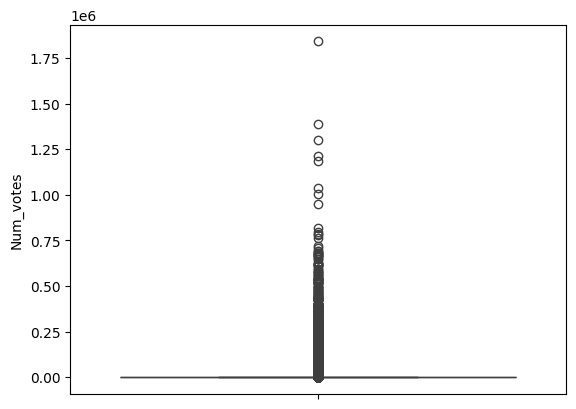

In [ ]:
#Checking for outliers in 'Num_votes' column
outliers_boxplot= sns.boxplot(data=title_ratings['Num_votes'])

<Axes: ylabel='Runtime_minutes'>

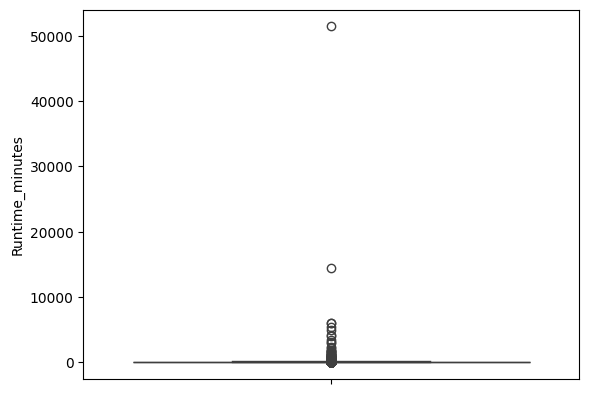

In [ ]:
#Checking for outliers in Running time in minutes column
sns.boxplot(y=title_basics['Runtime_minutes'])

From the above, we see that both the Run_time in minutes and Average_rating  from the title basics and title ratings datasets have outliers

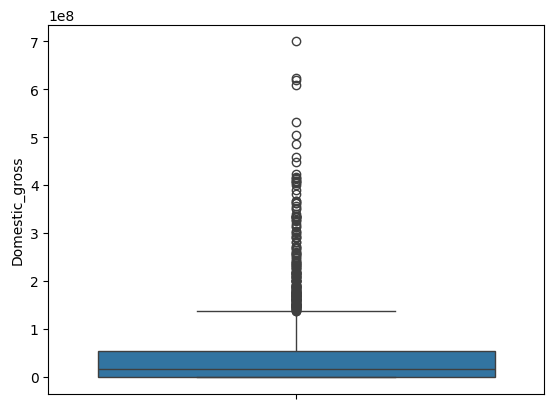

In [ ]:
#Checking for outliers in the Domestic_gross column
outliers_boxplot2 = sns.boxplot(data=movie_gross["Domestic_gross"])

<Axes: ylabel='Foreign_gross'>

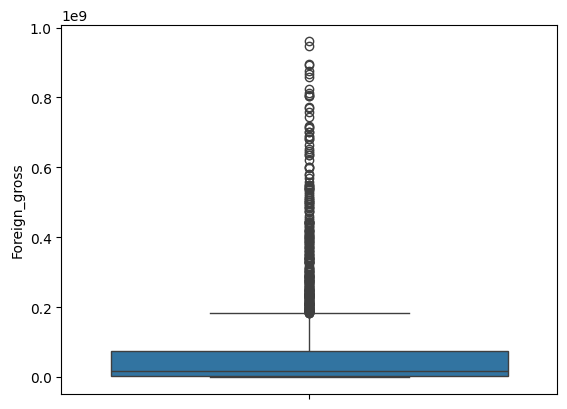

In [ ]:
#Checking for outliers in 'Foreign_gross' column
sns.boxplot(y=movie_gross['Foreign_gross'])


From the plots above, we have seen that both the Domestic_gross and the Foreign_gross columns have outliers.

I have decided to first investigate the nature of the outliers before deciding to remove them. They can be legitimate observations and are sometimes the most interesting ones.  

# Exporting our datasets

Now that we have cleaned our datasets , let's export and save them.

In [ ]:

#Saving our Datasets
movie_gross.to_csv('cleaned_movie_gross.csv',index=False)
title_basics.to_csv('cleaned_title_basics.csv',index=False)
title_ratings.to_csv('cleaned_title_ratings.csv',index=False)

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

Now that we have already cleaned our data, our datasets are ready for analysis. The analysis will be done using pandas as well as visualization tools. In this analysis, we will use Matploylib and Seaborn visualization libraries to gain meaningful insight of our case study.

This analysis, in relation to the problem statement will seek to answer and solve the following objective questions ;
- To determine what film genres perform the best? What are the top genres in the industry? What genres have the highest rating?
- To determine which films perform better in local markets and which films perform best in foreign markets?
- Does the length of a film contribute to its rating?
- To determine which film titles  have  the highest rating?
- To determine if the number of film genre has an effect on the rating?
- To detremine whether a change in title fromoriginal affects the rating?
- To determine which films generate the most revenue?


In [1]:
# Importing the standard libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


**Loading the Clean Data**

In [2]:
#Loading the data
new_movie_gross = pd.read_csv('/content/cleaned_movie_gross.csv')
new_title_basics=pd.read_csv('/content/cleaned_title_basics.csv')
new_title_ratings=pd.read_csv('/content/cleaned_title_ratings.csv')


Now let's merge the Data to start performing visualizations to answere our objectives.

**Merging the Data**

In [3]:
#Merging Data from our 3 datasets
merged_data = pd.merge(new_title_basics, new_title_ratings, on='Tconst')
final_merged = pd.merge(merged_data, new_movie_gross, left_on='Primary_title', right_on='Title', how='inner')
print(final_merged)

         Tconst                    Primary_title  \
0     tt0337692                      On the Road   
1     tt4339118                      On the Road   
2     tt5647250                      On the Road   
3     tt0359950  The Secret Life of Walter Mitty   
4     tt0365907      A Walk Among the Tombstones   
...         ...                              ...   
1758  tt7752454            Detective Chinatown 2   
1759  tt7784604                       Hereditary   
1760  tt8097306                    Nobody's Fool   
1761  tt8404272           How Long Will I Love U   
1762  tt9151704        Burn the Stage: The Movie   

                       Original_title     Title_status  Start_year  \
0                         On the Road  Different title        2012   
1                         On the Road  Different title        2014   
2                         On the Road  Different title        2016   
3     The Secret Life of Walter Mitty  Different title        2013   
4         A Walk Among th

In [4]:
#To confirm that my merged data is accurate
final_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tconst               1763 non-null   object 
 1   Primary_title        1763 non-null   object 
 2   Original_title       1763 non-null   object 
 3   Title_status         1763 non-null   object 
 4   Start_year           1763 non-null   int64  
 5   Runtime_minutes      1763 non-null   float64
 6   Genres               1763 non-null   object 
 7   More_than_one_genre  1763 non-null   bool   
 8   Average_rating       1763 non-null   float64
 9   Num_votes            1763 non-null   int64  
 10  Title                1763 non-null   object 
 11  Domestic_gross       1763 non-null   float64
 12  Foreign_gross        1763 non-null   float64
 13  Year                 1763 non-null   int64  
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 180.9+ KB


In [5]:
#To confoirm that my merged data has no null values
final_merged.isnull().sum()

Tconst                 0
Primary_title          0
Original_title         0
Title_status           0
Start_year             0
Runtime_minutes        0
Genres                 0
More_than_one_genre    0
Average_rating         0
Num_votes              0
Title                  0
Domestic_gross         0
Foreign_gross          0
Year                   0
dtype: int64

In [11]:
#Check for duplicates
final_merged.duplicated().sum()

0

In [6]:

final_merged.head(7)

,Tconst,Primary_title,Original_title,Title_status,Start_year,Runtime_minutes,Genres,More_than_one_genre,Average_rating,Num_votes,Title,Domestic_gross,Foreign_gross,Year
0,tt0337692,On the Road,On the Road,Different title,2012,124.0,"Adventure,Drama,Romance",True,6.1,37886,On the Road,744000.0,8000000.0,2012
1,tt4339118,On the Road,On the Road,Different title,2014,89.0,Drama,False,6.0,6,On the Road,744000.0,8000000.0,2012
2,tt5647250,On the Road,On the Road,Different title,2016,121.0,Drama,False,5.7,127,On the Road,744000.0,8000000.0,2012
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,Different title,2013,114.0,"Adventure,Comedy,Drama",True,7.3,275300,The Secret Life of Walter Mitty,58200000.0,129900000.0,2013
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,Different title,2014,114.0,"Action,Crime,Drama",True,6.5,105116,A Walk Among the Tombstones,26300000.0,26900000.0,2014
5,tt0372538,Spy,Spy,Different title,2011,110.0,"Action,Crime,Drama",True,6.6,78,Spy,110800000.0,124800000.0,2015
6,tt3079380,Spy,Spy,Different title,2015,119.0,"Action,Comedy,Crime",True,7.0,213908,Spy,110800000.0,124800000.0,2015


Let's begin with our visualizations.

Let us determine which film genre categories have the highest rating and compare with those that have the lowest rating

Genres
Adventure                         9.2
Action,Sport                      8.4
Drama,Western                     8.4
Adventure,Drama,Sci-Fi            8.3
Crime,Documentary                 8.3
Crime,Documentary,History         8.2
Fantasy                           8.2
Comedy,Drama,Thriller             8.1
Biography,Documentary,Thriller    8.1
Comedy,Crime,Documentary          8.0
Name: Average_rating, dtype: float64


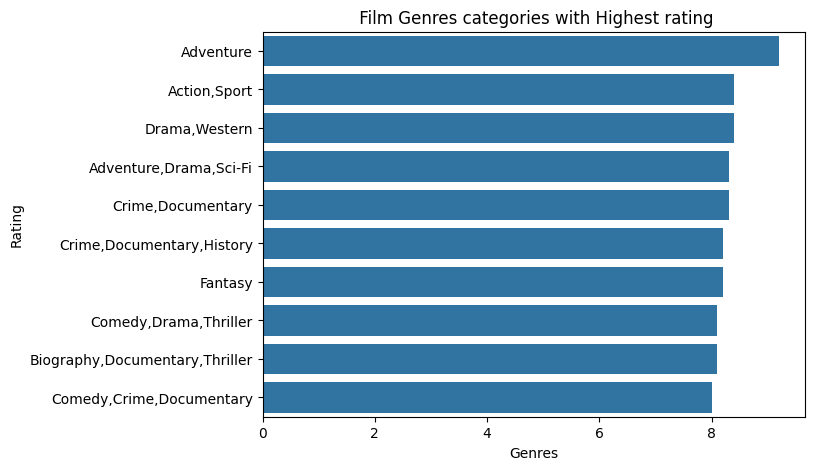

In [211]:
#To output the genres with the highest rating
highest_rating=final_merged.groupby('Genres')['Average_rating'].mean().sort_values(ascending=False).head(10)
print(highest_rating)

#Plotting a bargraph for the visualization
plt.figure(figsize=(7,5))
sns.barplot(x=highest_rating.values, y=highest_rating.index)
plt.title(' Film Genres categories with Highest rating')
plt.xlabel('Genres')
plt.ylabel('Rating')
plt.show()



Now that we have output genres withe highest rating, let us output those withe the lowest rating and compare

Genres
Comedy,Thriller           2.1
Drama,Mystery,Western     3.4
Fantasy,Horror            3.8
Sci-Fi                    4.2
Action,Family,Fantasy     4.3
Animation,Drama           4.5
Drama,Family,Music        4.6
Drama,Fantasy,Thriller    4.7
Animation,Comedy,Crime    4.8
Action,History            4.8
Name: Average_rating, dtype: float64


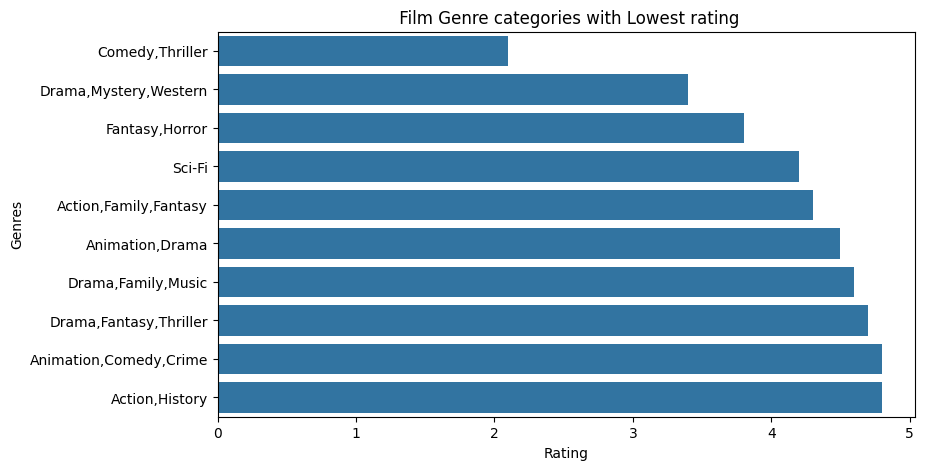

In [198]:
#To determine film genres withe the lowest rating
lowest_rating=final_merged.groupby('Genres')['Average_rating'].mean().sort_values(ascending=True).head(10)
print(lowest_rating)
#Plotting the bar graph to visualize

plt.figure(figsize=(9,5))
sns.barplot(x=lowest_rating.values, y=lowest_rating.index)
plt.title(' Film Genre categories with Lowest rating')
plt.xlabel('Rating')
plt.ylabel('Genres')
plt.show()

Let us determine if films with more than one genre have a better rating than those with only one genre

More_than_one_genre
False    6.407634
True     6.466422
Name: Average_rating, dtype: float64


<ipython-input-209-c8bca4e7d663>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='More_than_one_genre', data=final_merged ,palette='rainbow' ).set(title='More than one Genre to Rating')


[Text(0.5, 1.0, 'More than one Genre to Rating')]

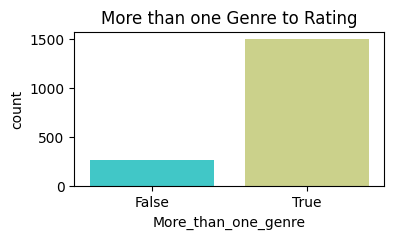

In [209]:
#To determine if films with more than one genre have a higher rating than those with one
more_rating=final_merged.groupby('More_than_one_genre')['Average_rating'].mean()
print(more_rating)

#Plotting the output
plt.figure(figsize=(4,2))
sns.countplot(x='More_than_one_genre', data=final_merged ,palette='rainbow' ).set(title='More than one Genre Rating')

In [83]:
final_merged.columns

Index(['Tconst', 'Primary_title', 'Original_title', 'Title_status',
       'Start_year', 'Runtime_minutes', 'Genres', 'More_than_one_genre',
       'Average_rating', 'Num_votes', 'Title', 'Domestic_gross',
       'Foreign_gross', 'Year'],
      dtype='object')

Let us also determine if the runtime in minutes of the different film titles has a effect on the ratings

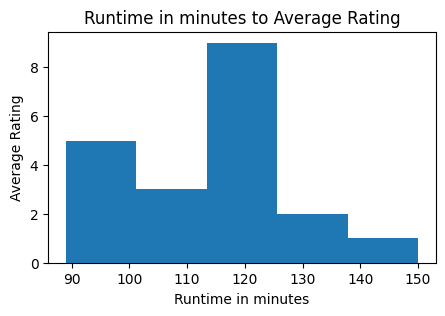

In [199]:
#To determine if the runtime in minutes of the film has an effect on the ratings
#To determine what length of film are preferred more than others.

x=final_merged['Runtime_minutes'].head(20)
y=final_merged['Average_rating'].head(20)
#Plotting a bargraph for the trend

plt.figure(figsize=(5,3))
plt.hist(x,bins=5)
plt.title('Runtime in minutes to Average Rating')
plt.xlabel('Runtime in minutes')
plt.ylabel('Average Rating')
plt.show()


To determine which genre generates the highest revenue in foreign and Domestic markets respectively

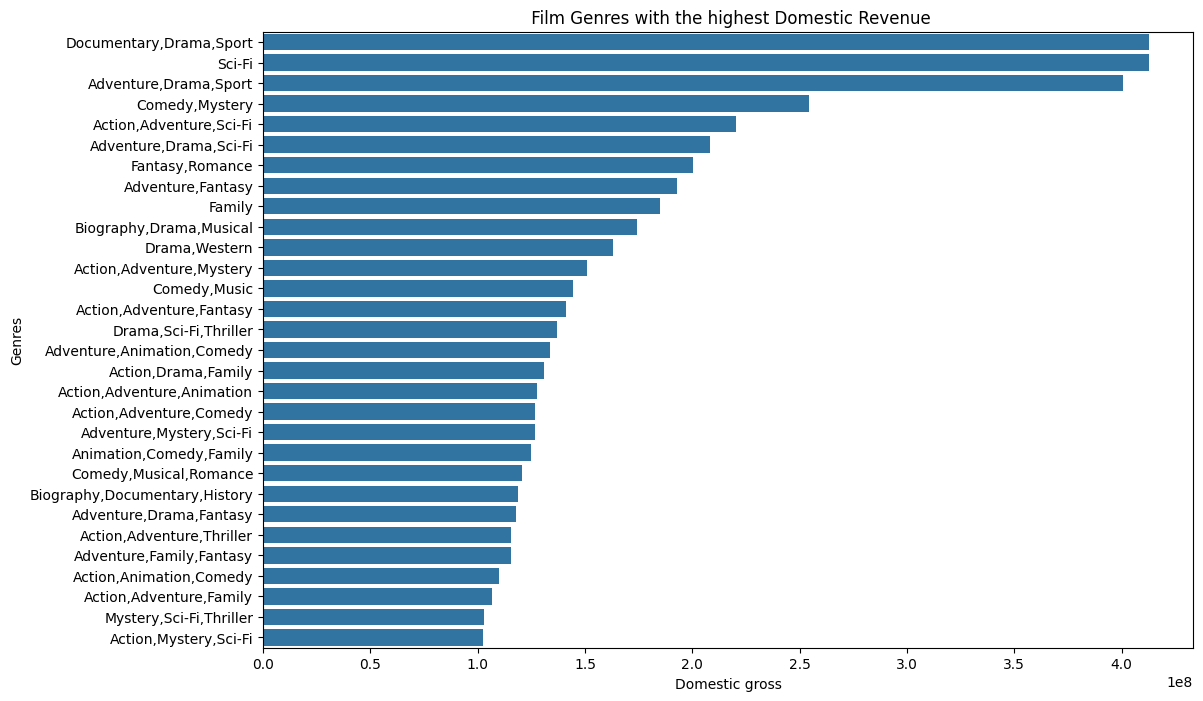

In [80]:
#To determine which film genre  generates highest Domestic Revenue

genre_gross=final_merged.groupby('Genres')['Domestic_gross'].mean().sort_values(ascending=False).head(30)
#print(genre_gross)
#Plotting the bar graph to visualize

plt.figure(figsize=(12,8))
sns.barplot(x=genre_gross.values, y=genre_gross.index)
plt.title(' Film Genres with the highest Domestic Revenue')
plt.xlabel('Domestic gross')
plt.ylabel('Genres')
plt.show()

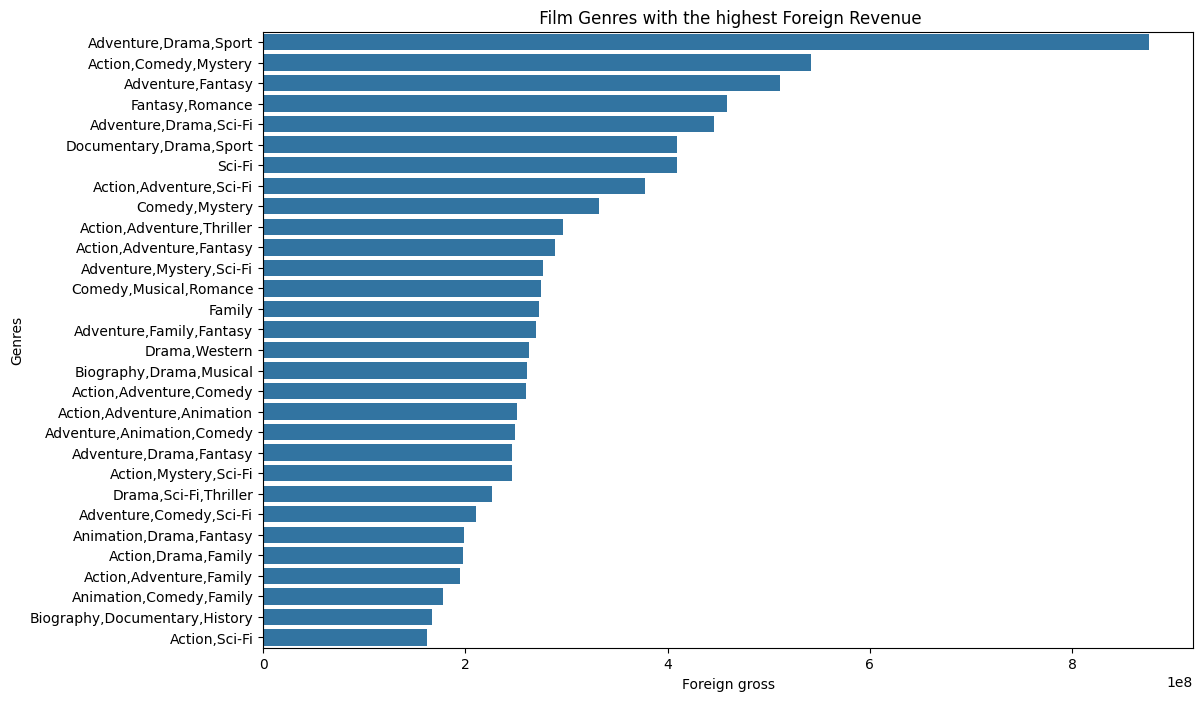

In [103]:
#To determine which film genre generates highest Foreign Revenue

genre_gross=final_merged.groupby('Genres')['Foreign_gross'].mean().sort_values(ascending=False).head(30)
#print(genre_gross)
#Plotting the bar graph to visualize

plt.figure(figsize=(12,8))
sns.barplot(x=genre_gross.values, y=genre_gross.index)
plt.title(' Film Genres with the highest Foreign Revenue')
plt.xlabel('Foreign gross')
plt.ylabel('Genres')
plt.show()

                           Average_rating
Title                                    
The Runaways                          9.2
The Wall                              9.2
Inception                             8.8
Burn the Stage: The Movie             8.8
Coriolanus                            8.7
Eyes Wide Open                        8.7
Interstellar                          8.6
Senna                                 8.6
Kin                                   8.6
The Tempest                           8.5


<ipython-input-215-92015005b4d8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_rating', y=top_length.index, data=top_length, label='top10 film', palette='rainbow')


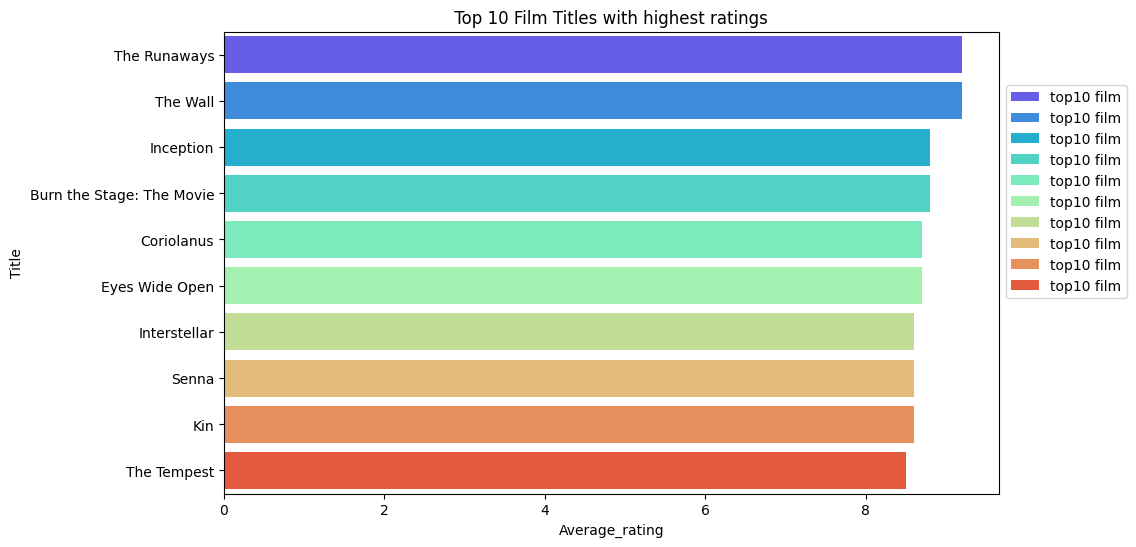

In [215]:
#To display the top 10 movie titles and Rating
top_length=final_merged.nlargest(10, 'Average_rating')[['Title','Average_rating']].set_index('Title')
print(top_length)
#Plotting the values
plt.figure(figsize=(10,6))
sns.barplot(x='Average_rating', y=top_length.index, data=top_length, label='top10 film', palette='rainbow')
plt.title(' Top 10 Film Titles with highest ratings ')
plt.legend(bbox_to_anchor=(1.00, 0.9), loc=2)
plt.show()


In [105]:
#To determine whether the title change of films affects the rating
more_genre=final_merged.loc[(final_merged['Title_status']=='True')]
more_genre.value_counts('Average_rating', normalize=True)


Series([], Name: proportion, dtype: float64)

Now, let us determine which film titles generate the highest revenue

                                 Domestic_gross
Title                                          
Black Panther                       700100000.0
Star Wars: The Last Jedi            620200000.0
Incredibles 2                       608600000.0
Rogue One: A Star Wars Story        532200000.0
Finding Dory                        486300000.0
Avengers: Age of Ultron             459000000.0
The Dark Knight Rises               448100000.0
The Hunger Games: Catching Fire     424700000.0
Jurassic World: Fallen Kingdom      417700000.0
Toy Story 3                         415000000.0


<ipython-input-183-0ac517560d5c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Domestic_gross', y=top_title_revenue.index, data=top_title_revenue, label='top10 film', palette='rainbow')


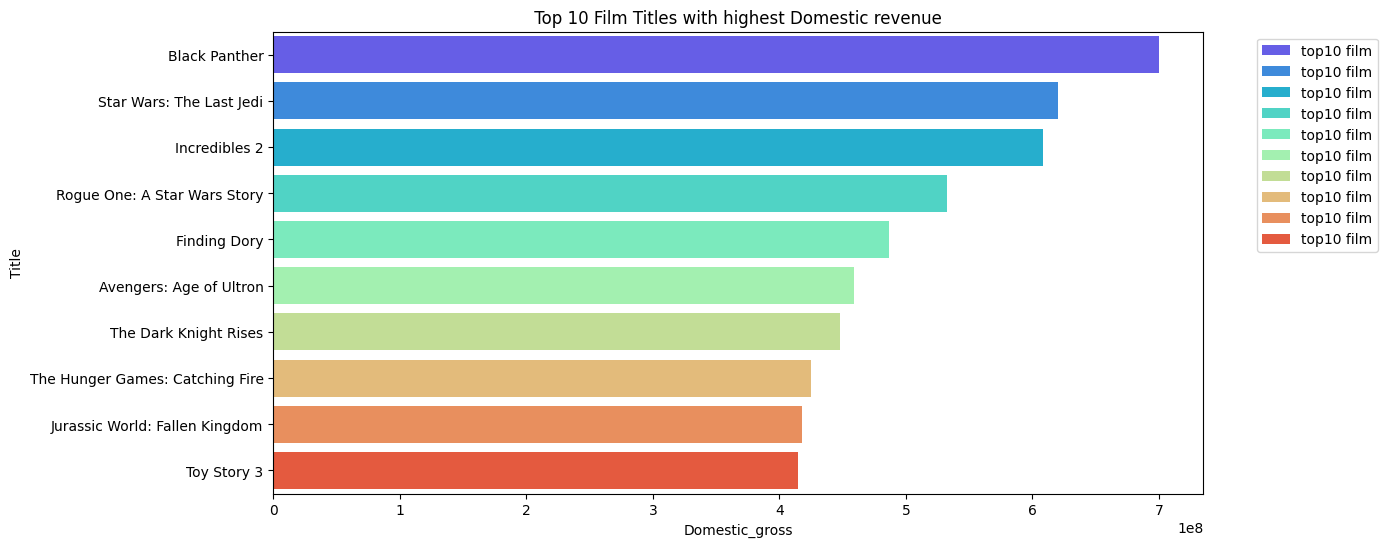

In [183]:
#To determine the trends in film titles in relation to Domestic revenue
#Which film titles with the highest Domestic revenue

top_title_revenue=final_merged.nlargest(10, 'Domestic_gross')[['Title','Domestic_gross']].set_index('Title')
print(top_title_revenue)
#Plotting the values
plt.figure(figsize=(12,6))
sns.barplot(x='Domestic_gross', y=top_title_revenue.index, data=top_title_revenue, label='top10 film', palette='rainbow')
plt.title(' Top 10 Film Titles with highest Domestic revenue ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

                                 Foreign_gross
Title                                         
Avengers: Age of Ultron            946400000.0
Jurassic World: Fallen Kingdom     891800000.0
Frozen                             875700000.0
Frozen                             875700000.0
Frozen                             875700000.0
Wolf Warrior 2                     867600000.0
Transformers: Age of Extinction    858600000.0
Minions                            823400000.0
Aquaman                            812700000.0
Iron Man 3                         805800000.0


<ipython-input-213-acead1a708c5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Foreign_gross', y=top_title_revenue2.index, data=top_title_revenue2, palette='rainbow', label='top10')


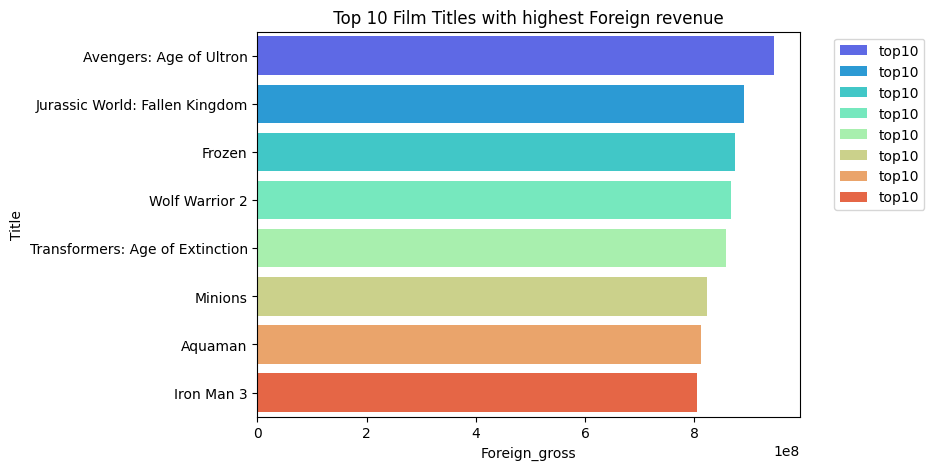

In [213]:
#To determine the trends in film titles in relation to Foreign revenue
#Which film titles with the highest Domestic revenue

top_title_revenue2=final_merged.nlargest(10, 'Foreign_gross')[['Title','Foreign_gross']].set_index('Title')
print(top_title_revenue2)
#Plotting the values
plt.figure(figsize=(7,5))
sns.barplot(x='Foreign_gross', y=top_title_revenue2.index, data=top_title_revenue2, palette='rainbow', label='top10')
plt.title(' Top 10 Film Titles with highest Foreign revenue ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## Evaluation

***

- The film genres with the highest ratings was: Adventure at 9.2 rating and the lowest rating was: Comedy,Thriller with 2.1 rating.

- Films with more than one genre generally have a higher rating than films with only one genre

- The length of films does not have an effect on the ratings.
- The film titles with the highest ratings were: The Runaways and The wall
- The top 10 film with highest ratings were:
The Runaways                          9.2
The Wall                              9.2
Inception                             8.8
Burn the Stage: The Movie             8.8
Coriolanus                            8.7
Eyes Wide Open                        8.7
Interstellar                          8.6
Senna                                 8.6
Kin                                   8.6
The Tempest
- To film genres that generated the most Domestic revenue were: Documentary,Darama,Sport and Sci-Fi and those which generated most Foreign revenue were; Adventure,Drama and Sport
- The film titles with highest domestic revenue was: Black Panther and Foreign revenue was: Avengers-Age of Ultron





The analysis above will help you decide what films to produce in your new movie studio. I am positive that the analysis has revealed  the steps that you should take towards starting your own movie studio and the success of the company in conquering the market as well as generating revenue. Best of Luck!

# Conclusion
From the analysis;
- I would recommend that you focus on producing more movies that favour the Foreign market because they generate a higher income than the Domestic market.Which is a more profitable venture. Although i would recommend that further analysis be done on this to figure out why this is the case.
- I would also recommend that you don;t produce very long films especially those that are more than 120 minutes as the rating is low . People prefer movies that have a running time of less than 120 minutes.
- I would also recommend that you focus more on Adventure, Sport and Darama Genres as they have the highest rating and highest vieweship.

- However, the analysis might not fully solve the business problem because there are some deliverables that are difficult to tackle and fully answer, as is the norm with any other analysis. You cannot always fully answer the business problem.